<a href="https://colab.research.google.com/github/AnuragAgarwal00/machine_learning_wine-dataset/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [17]:
X = df.drop(columns=['price']).values
y = df['price'].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [74]:
ordinal_columns = ['property_type', "agePossession", ]
nominal_columns = ['society', 'sector']
ordinal_df = df[ordinal_columns]
nominal_df = df[nominal_columns]

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
X = nominal_df.values
color_le = LabelEncoder()
X[:, 1]= color_le.fit_transform(X[:, 1])




array([[508, 36],
       [521, 95],
       [102, 103],
       ...,
       [26, 23],
       [258, 44],
       [305, 71]], dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe1 = ohe.fit_transform(X[:, 0].reshape(-1, 1))
ohe1.shape
ohe1.toarray().shape, df['society'].value_counts()


((3550, 659),
 society
 independent                             422
 tulip violet                             74
 ss the leaf                              73
 dlf new town heights                     42
 shapoorji pallonji joyville gurugram     41
                                        ... 
 ramprasta awho                            1
 ashiana apartment                         1
 adani brahma samsara                      1
 citizen apartment                         1
 dlf wellington estate                     1
 Name: count, Length: 659, dtype: int64)

In [117]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


In [113]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

In [137]:
Y = df_wine.iloc[0:, 0]
X = df_wine.iloc[:, 1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [147]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scale = StandardScaler()
X_train_min_max = scale.fit_transform(X_train)
X_test_min_max = scale.transform(X_test)

In [141]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=1.0)
lr.fit(X_train_min_max, y_train)
print('accuracy: train', lr.score(X_train_min_max, y_train))
print('accuracy: test', lr.score(X_test_min_max, y_test))

accuracy: train 1.0
accuracy: test 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [151]:
lr.intercept_

array([-1.26350975, -1.21599327, -2.3706801 ])

In [165]:
lr.coef_[0]

array([ 1.24573158,  0.18039484,  0.74495658, -1.16256017,  0.        ,
        0.        ,  1.16475516,  0.        ,  0.        ,  0.        ,
        0.        ,  0.55267535,  2.50962933])

In [162]:
len(df_wine.iloc[:, 1:].columns.values)

13

In [191]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3)
seq = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')
r = seq.fit_transform(X_train_min_max, y_train)



In [198]:
seq.get_feature_names_out()

array(['x3', 'x6', 'x9'], dtype=object)

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=12)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=12)

([<matplotlib.axis.XTick at 0x7f54c7985b50>,
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Malic acid'),
  Text(2, 0, 'Ash'),
  Text(3, 0, 'Alcalinity of ash'),
  Text(4, 0, 'Magnesium'),
  Text(5, 0, 'Total phenols'),
  Text(6, 0, 'Flavanoids'),
  Text(7, 0, 'Nonflavanoid phenols'),
  Text(8, 0, 'Proanthocyanins'),
  Text(9, 0, 'Color intensity'),
  Text(10, 0, 'Hue'),
  Text(11, 0, 'OD280/OD315 of diluted wines'),
  Text(12, 0, 'Proline')])

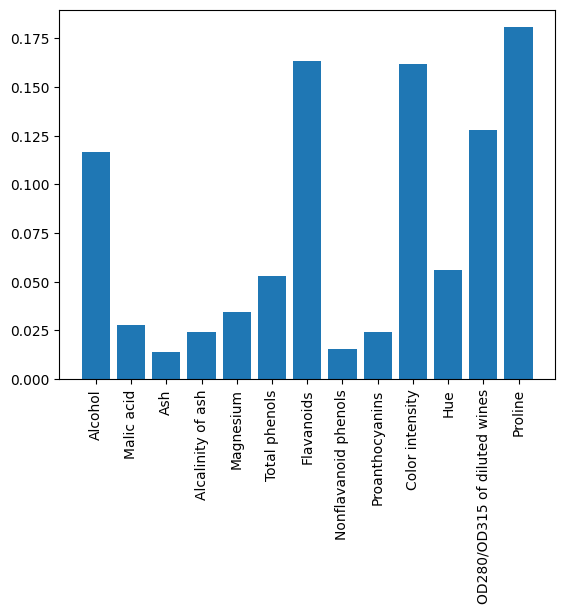

In [225]:
r = np.argsort(rf.feature_importances_)[::-1]
r, rf.feature_importances_
plt.bar(range(X_train.shape[1]), rf.feature_importances_, align='center')
plt.xticks(range(X_train.shape[1]),X.columns, rotation=90)